## Cleaning and Prepare data

### import necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### eliminate unnecessary data

In [2]:
# handle error solving
try:
    df = pd.read_csv('../data/processed/clean1.csv')
except Exception as e:
    print("Oops! Something went wrong. ensure you have run file: main.ipynb")
    raise


# Calculate the percentage of zeros in each column
zero_percentage = (df == 0).sum() / len(df) * 100

# Identify columns where zeros are less than or equal to 70%
columns_to_keep = zero_percentage[zero_percentage <= 70].index.tolist()

# Keep only these columns in the DataFrame
df_cleaned = df[columns_to_keep]

# Save or display the result
print(f'Number of column: {len(columns_to_keep)}')
print("Columns retained in the cleaned DataFrame:")
print(columns_to_keep)


Number of column: 11
Columns retained in the cleaned DataFrame:
['Year', 'biomass_relative_to_msy', 'total_biomass', 'spawning_stock_biomass', 'total_catch', 'fishing_mortality', 'exploitation_rate', 'total_biomass_relative_to_msy', 'spawning_stock_relative_to_msy', 'fishing_mortality_relative_to_msy', 'catch_relative_to_msy']


In [3]:
file_path = '../data/processed/clean2.csv'
df_cleaned.to_csv(file_path,index=False)
print(f'Saved file in {file_path}')

Saved file in ../data/processed/clean2.csv


### handle missing data

In [4]:
# Load the dataset
file_path = '../data/processed/clean2.csv'
df = pd.read_csv(file_path)

# Define a function to determine if a column is discrete
def is_discrete(column):
    if pd.api.types.is_integer_dtype(column):
        return True
    if column.nunique() < 20:
        return True
    # Check if the column is a float but has integer-like values (e.g., 1.0, 2.0)
    if column.dtype == 'float' and (column == column.astype(int)).all():
        return True
    return False

# Iterate through the columns and fill values accordingly
for col in df.columns:
    if col == 'Year':  # Skip the Year column as it's temporal
        continue
    
    if is_discrete(df[col]):
        # Fill missing or zero values with the median for discrete variables
        df[col] = df[col].replace(0, np.nan)  # Replace zeros with NaN if necessary
        df[col] = df[col].fillna(df[col].median())
        # Convert to integer if values are discrete (like 1.0, 2.0)
        if df[col].dtype == 'float' and (df[col] == df[col].astype(int)).all():
            df[col] = df[col].astype(int)
        # print(f'int: {col}')
    else:
        # Fill missing or zero values with the mean for continuous variables
        df[col] = df[col].replace(0, np.nan)  # Replace zeros with NaN if necessary
        df[col] = df[col].fillna(df[col].mean())
        # print(f'float: {col}')

# Save or display the cleaned DataFrame
print("Cleaned DataFrame with missing values filled:")
df.head()

Cleaned DataFrame with missing values filled:


,Year,biomass_relative_to_msy,total_biomass,spawning_stock_biomass,total_catch,fishing_mortality,exploitation_rate,total_biomass_relative_to_msy,spawning_stock_relative_to_msy,fishing_mortality_relative_to_msy,catch_relative_to_msy
0,1930,2.72,1140000,3489000,546450,0.0105,0.350674,2.72,1.90,0.112,4.205457
1,1931,2.69,9690000,1280000,546450,0.0152,0.350674,2.69,1.89,0.157,4.205457
2,1932,2.65,9670000,1280000,546450,0.0117,0.350674,2.65,1.87,0.131,4.205457
3,1933,2.63,9660000,1280000,546450,0.0108,0.350674,2.63,1.87,0.118,4.205457
4,1934,2.61,9650000,1280000,546450,0.0169,0.350674,2.61,1.86,0.196,4.205457


In [5]:
df.tail()

,Year,biomass_relative_to_msy,total_biomass,spawning_stock_biomass,total_catch,fishing_mortality,exploitation_rate,total_biomass_relative_to_msy,spawning_stock_relative_to_msy,fishing_mortality_relative_to_msy,catch_relative_to_msy
82,2012,8.263,5395000,2123000,844000,1.731700,0.630307,4.420000,6.813,4.024,4.753631
83,2013,8.077,5588000,2053500,36400,1.741600,0.569681,4.339000,5.815,3.746,2.132655
84,2014,5.570,6003000,2088700,546450,1.025700,0.554242,2.973000,3.250,3.248,1.063802
85,2015,1.770,4138000,2291000,546450,0.842000,0.282456,7.906847,1.770,1.811,0.889323
86,2016,0.380,1070000,130000,546450,0.669866,0.013458,7.906847,0.380,0.496,4.205457


Saved figure in ../results/figures/org_total_biomass.png


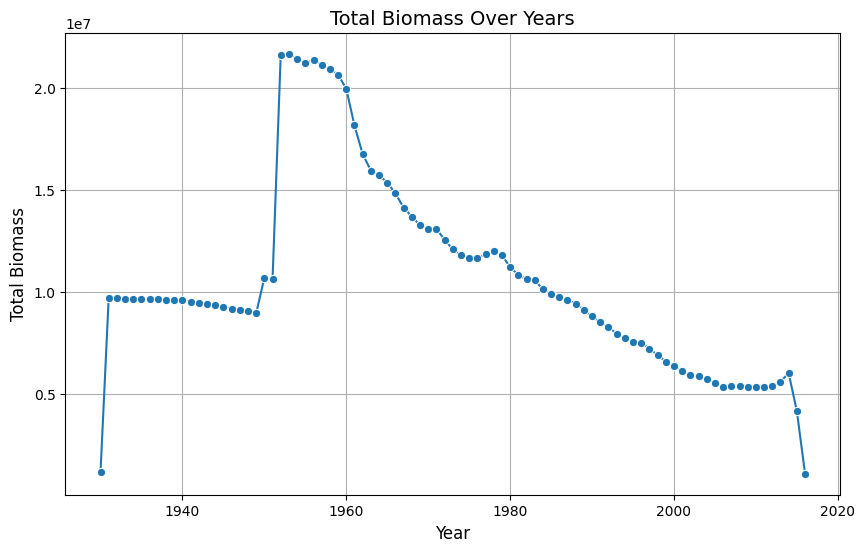

In [6]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='total_biomass', marker='o')
plt.title('Total Biomass Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Biomass', fontsize=12)
plt.grid(True)
file_path = '../results/figures/org_total_biomass.png'
plt.savefig(file_path, dpi=300, bbox_inches='tight')
print(f'Saved figure in {file_path}')
plt.show()


Saved figure in ../results/figures/filtered_total_biomass.png


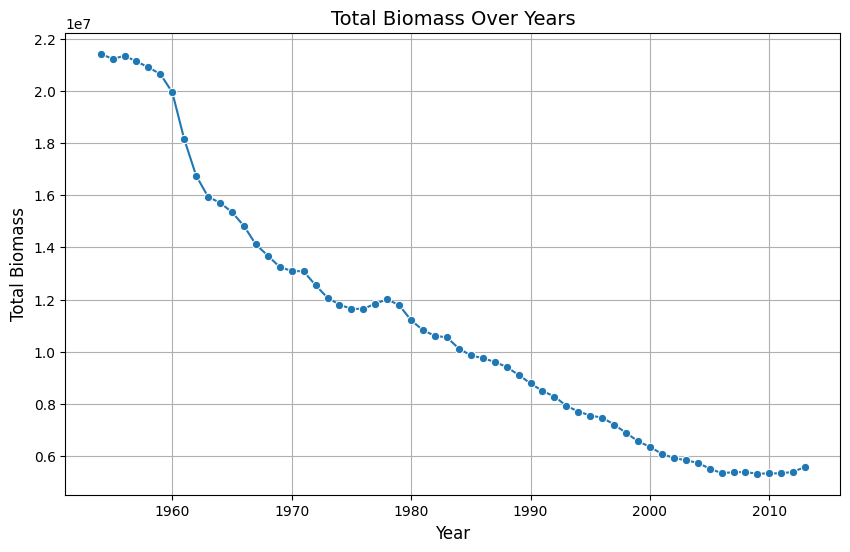

In [7]:
df = df.iloc[24:-3]

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='total_biomass', marker='o')
plt.title('Total Biomass Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Biomass', fontsize=12)
plt.grid(True)
file_path = '../results/figures/filtered_total_biomass.png'
plt.savefig(file_path, dpi=300, bbox_inches='tight')
print(f'Saved figure in {file_path}')
plt.show()


In [8]:
file_path = '../data/processed/clean3.csv'
df.to_csv(file_path,index=False)
print(f'Saved file in {file_path}')

Saved file in ../data/processed/clean3.csv


### resampling data

In [9]:
df = pd.read_csv('../data/processed/clean3.csv')

df['Normalized'] = df['total_biomass'] / df['total_biomass'].sum()

data = df[['Year','Normalized']]

data.head(10)
# Interpolation to increase rows (e.g., 3x more data points)
new_years = np.linspace(data['Year'].min(), data['Year'].max(), len(data) * 4)
interpolated_values = np.interp(new_years, data['Year'], data['Normalized'])

print(len(interpolated_values))
print(interpolated_values[:10])

240
[0.03234461 0.03226932 0.03219403 0.03211875 0.03204346 0.03208243
 0.03212753 0.03217263 0.03221773 0.03215167]


In [10]:
# Add small random noise to maintain a "natural" look
noise = np.random.uniform(0.8, 1.2, size=len(interpolated_values))
interpolated_values *= noise

# Create new DataFrame
new_data = pd.DataFrame({'Year': new_years, 'Normalized': interpolated_values})

new_data.head(10)

,Year,Normalized
0,1954.000000,0.031571
1,1954.246862,0.034738
2,1954.493724,0.034261
3,1954.740586,0.028305
4,1954.987448,0.033559
5,1955.234310,0.031827
6,1955.481172,0.026635
7,1955.728033,0.033215
8,1955.974895,0.029102
9,1956.221757,0.035482


Saved figure in ../results/figures/raw_and_resampling_data.png


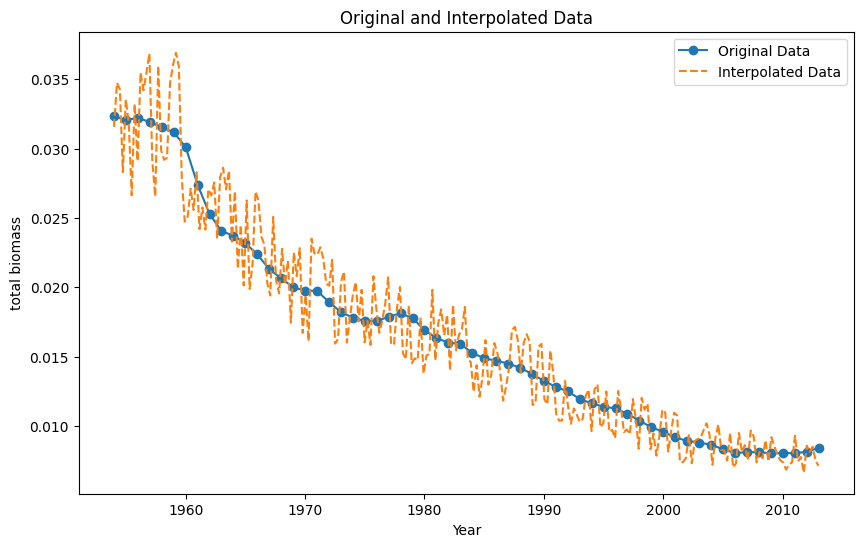

In [11]:
# Plot to visualize
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Normalized'], label='Original Data', marker='o')
plt.plot(new_data['Year'], new_data['Normalized'], label='Interpolated Data', linestyle='--')
plt.legend()
plt.title('Original and Interpolated Data')
plt.xlabel('Year')
plt.ylabel('total biomass')
file_path = '../results/figures/raw_and_resampling_data.png'
plt.savefig(file_path, dpi=300, bbox_inches='tight')
print(f'Saved figure in {file_path}')
plt.show()

In [12]:
data = df.copy()

# Assuming 'data' is your original DataFrame
new_years = np.linspace(data['Year'].min(), data['Year'].max(), len(data) * 4)

# Initialize an empty dictionary to store interpolated columns
interpolated_data = {'Year': new_years}

# Generate noise once for all rows
noise = np.random.uniform(0.8, 1.2, size=len(new_years))

# Interpolate each column and apply the noise
for col in data.columns:
    if col != 'Year':  # Skip the 'Year' column
        interpolated_values = np.interp(new_years, data['Year'], data[col])
        interpolated_data[col] = interpolated_values * noise

# Create the new DataFrame
new_data = pd.DataFrame(interpolated_data)

# Display the first 10 rows of the new interpolated data
new_data.head()

,Year,biomass_relative_to_msy,total_biomass,spawning_stock_biomass,total_catch,fishing_mortality,exploitation_rate,total_biomass_relative_to_msy,spawning_stock_relative_to_msy,fishing_mortality_relative_to_msy,catch_relative_to_msy,Normalized
0,1954.000000,17.264153,2.070828e+07,7.771769e+06,92004.597536,0.074402,0.056956,12.720955,14.277242,0.647406,1.519113,0.031266
1,1954.246862,15.943292,1.915353e+07,7.158587e+06,86049.912074,0.068247,0.051424,11.817666,13.174189,0.569955,1.376178,0.028918
2,1954.493724,16.814457,2.023158e+07,7.530003e+06,91904.476529,0.071483,0.052986,12.537777,13.882656,0.571424,1.422986,0.030546
3,1954.740586,16.127281,1.943518e+07,7.203183e+06,89262.723716,0.068086,0.049613,12.097276,13.304286,0.519387,1.337389,0.029343
4,1954.987448,16.805039,2.028391e+07,7.485861e+06,94184.212283,0.070448,0.050431,12.681177,13.851843,0.511090,1.364774,0.030625


In [13]:
file_path = '../data/processed/resampling_data.csv'
new_data.to_csv(file_path,index=False)
print(f'Saved file in {file_path}')

Saved file in ../data/processed/resampling_data.csv
